In [29]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.patches as patches
% matplotlib inline

In [125]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/min_ice/nasaRun/Y*2008*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))
ptrc=nc.Dataset(nc_filename[0])

uvel=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_eng3/ANHA4-ENG3_gridU_19692008.nc')
print uvel.variables

vvel=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_eng3/ANHA4-ENG3_gridV_19692008.nc')
print vvel.variables

wvel=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_eng3/ANHA4-ENG3_gridW_19692008.nc')
print wvel.variables

#tfield=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_eng3/ANHA4-ENG3_gridT_19692008.nc')
#print tfield.variables

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/min_ice/nasaRun/Y19682008.nc']
OrderedDict([(u'nav_lon', <netCDF4.Variable object at 0x7f3a31726218>), (u'nav_lat', <netCDF4.Variable object at 0x7f3a31726180>), (u'depthu', <netCDF4.Variable object at 0x7f3a317263e0>), (u'time_counter', <netCDF4.Variable object at 0x7f3a317268a0>), (u'vozocrtx', <netCDF4.Variable object at 0x7f3a31726510>), (u'sozotaux', <netCDF4.Variable object at 0x7f3a31726050>)])
OrderedDict([(u'nav_lon', <netCDF4.Variable object at 0x7f3a351feb98>), (u'nav_lat', <netCDF4.Variable object at 0x7f3a351fe348>), (u'depthv', <netCDF4.Variable object at 0x7f3a351fea68>), (u'time_counter', <netCDF4.Variable object at 0x7f3a351fe218>), (u'vomecrty', <netCDF4.Variable object at 0x7f3a351fe2b0>), (u'sometauy', <netCDF4.Variable object at 0x7f3a351fe640>)])
OrderedDict([(u'nav_lon', <netCDF4.Variable object at 0x7f3a351fe3e0>), (u'nav_lat', <netCDF4.Variable object at 0x7f3a351fe8a0>), (u'depthw', <netCDF4.Variable o

In [119]:
lon=ptrc.variables['nav_lon'][:,:]
lat=ptrc.variables['nav_lat'][:,:]
dep = ptrc.variables['deptht'][:]


tmask=nc.Dataset(
        '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc')
mbathy=tmask.variables['mbathy'][0,400:,:]
tmask=tmask.variables['tmask'][0,:,400:,:]


bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

In [126]:
yearnum=len(ptrc.variables['TR_7'][:,0,0,0])

found *.csv file: 
['/ocean/xiaoxiny/research/data/total/Total_r1.csv', '/ocean/xiaoxiny/research/data/total/Total_r2.csv', '/ocean/xiaoxiny/research/data/total/Total_r3.csv', '/ocean/xiaoxiny/research/data/total/Total_r4.csv', '/ocean/xiaoxiny/research/data/total/Total_r5.csv', '/ocean/xiaoxiny/research/data/total/Total_r6.csv']


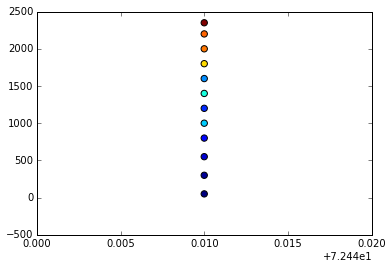

In [107]:
import pandas as pd
total_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/total/T*.csv'))
print("found *.csv file: \n{}".format(total_filename))
for j,s in zip([2],[2007]):#range(len(total_filename)):
    data=pd.read_csv(total_filename[j])
    ty= data['depth'].values;
    tx=data['231 tot.'].values; #230Th tot.
    tlon = data['long.'].values;
    tlat = data['lat.'].values;
    tname= data['name'][0];
    
    y_=[];x_=[];s_=[];lat_=[];
    for i in range (len(tx)):
        if tx[i]>=0:
            y_.append(ty[i]);x_.append(tx[i])
            s_.append(s);lat_.append(tlat[i])
    
    if len(s_)!=0:
        plt.scatter(lat_,y_,c=x_,s=40)

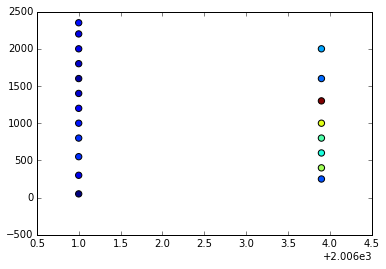

In [106]:
y__=[];xTh_=[];s__=[];lat_=[];
for j,s in zip([2,3],[2007,2009.9]):#range(len(total_filename)):
    data=pd.read_csv(total_filename[j])
    ty= data['depth'].values;
    tx=data['230Th tot.'].values; #230Th tot.
    tlon = data['long.'].values;
    tlat = data['lat.'].values;
    tname= data['name'][0];
    
    
    for i in range (len(tx)):
        if tx[i]>=0:
            y__.append(ty[i]);xTh_.append(tx[i])
            s__.append(s);lat_.append(tlat[i])
    

plt.scatter(s__,y__,c=xTh_,s=40)

(39,)
0


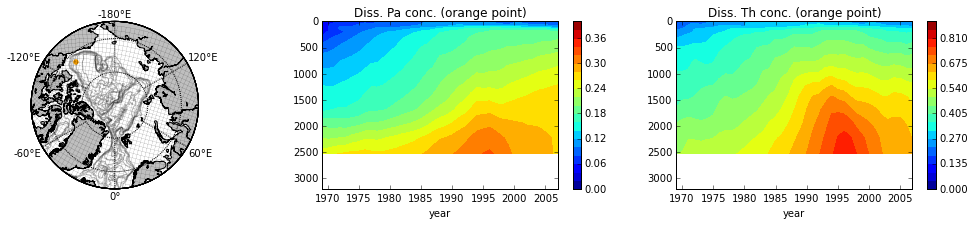

In [127]:
x=np.array([700-400])#/2
y=np.array([170])#/2
c=['orange','red','cyan']


time=np.empty(yearnum)
print time.shape
for i in range (len(time)):
    time[i]=i+1969
    
    
fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(1,3,1)
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round='TRUE')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,80.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
m.scatter(x_lon[x,y],y_lat[x,y],color=c,s=20)
cs=m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.3)
#plt.clabel(cs, fontsize=10, inline=1,fmt = '%1.0f')
    

for i in range (len(y)):
    print i
    ax = fig.add_subplot(1,3,2)
    data=ptrc.variables['TR_7'][:,10:,x[i],y[i]]
    data=np.ma.masked_where(data<=0,data)
    ax.add_patch(patches.Rectangle((0, dep[mbathy[x[i],y[i]]-1]), len(time),3000,hatch='///',
                                   fill=False,alpha=0.5))
    
    plt.contourf(time[:],dep[10:],data.T,np.linspace(0, 0.4, 21))
    plt.colorbar()
    plt.title('Diss. Pa conc. (%s point)'%c[i])
    plt.ylim(0,3200)
    plt.xlim(1969,1969+len(time)-1,5)
    plt.xlabel('year')
    ax.invert_yaxis()
    #lt.xticks(np.arange(0, len(time)+1, 5))
   

for i in range (len(y)):
    ax = fig.add_subplot(1,3,3)
    data=ptrc.variables['TR_8'][:,10:,x[i],y[i]]
    data=np.ma.masked_where(data<=0,data)
    ax.add_patch(patches.Rectangle((0, dep[mbathy[x[i],y[i]]-1]), len(time),3000,hatch='///',
                                   fill=False,alpha=0.5))
    
    plt.contourf(time[:],dep[10:],data.T,np.linspace(0,0.9, 21))
    plt.colorbar()
    plt.title('Diss. Th conc. (%s point)'%c[i])
    plt.ylim(0,3200)
    plt.xlim(1969,1969+len(time)-1,5)
    plt.xlabel('year')
    ax.invert_yaxis() 
    #lt.xticks(np.arange(0, len(time)+1, 5))

plt.show()

In [121]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/min_ice/nasaRun/*1y*2010*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))
ptrc=nc.Dataset(nc_filename[0])

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/min_ice/nasaRun/S_ANHA4-ENG4_1y_20050101_20101231_ptrc_T.nc']


(6,)
0


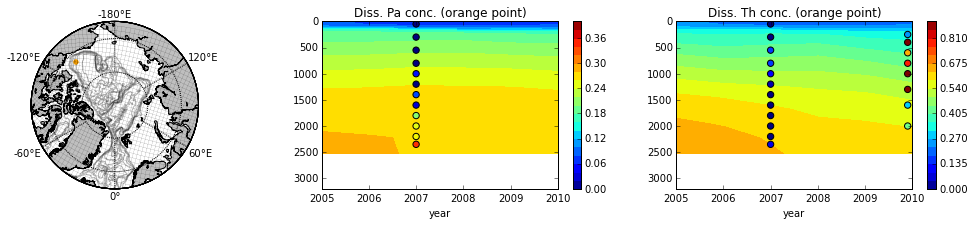

In [114]:
yearnum=len(ptrc.variables['TR_7'][:,0,0,0])
time=np.empty(yearnum)
print time.shape
for i in range (len(time)):
    time[i]=i+2005
    
    
fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(1,3,1)
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round='TRUE')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,80.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
m.scatter(x_lon[x,y],y_lat[x,y],color=c,s=20)
cs=m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.3)
#plt.clabel(cs, fontsize=10, inline=1,fmt = '%1.0f')
    

for i in range (len(y)):
    print i
    ax = fig.add_subplot(1,3,2)
    data=ptrc.variables['TR_7'][:,10:,x[i],y[i]]
    data=np.ma.masked_where(data<=0,data)
    ax.add_patch(patches.Rectangle((0, dep[mbathy[x[i],y[i]]-1]), len(time),3000,hatch='///',
                                   fill=False,alpha=0.5))
    
    plt.contourf(time[:],dep[10:],data.T,np.linspace(0, 0.4, 21))
    plt.colorbar()
    

    plt.scatter(s_,y_,c=x_,vmin=data.min(),vmax=data.max(),s=40)
    
    
    plt.title('Diss. Pa conc. (%s point)'%c[i])
    plt.ylim(0,3200)
    plt.xlim(2005,2005+len(time)-1)
    #plt.xlim(1,len(time))
    plt.xlabel('year')
    ax.invert_yaxis()
    ax.ticklabel_format(useOffset=False)
    #plt.xticks(np.arange(1, len(time)+1, 1))
   

for i in range (len(y)):
    ax = fig.add_subplot(1,3,3)
    data=ptrc.variables['TR_8'][:,10:,x[i],y[i]]
    data=np.ma.masked_where(data<=0,data)
    ax.add_patch(patches.Rectangle((0, dep[mbathy[x[i],y[i]]-1]), len(time),3000,hatch='///',
                                   fill=False,alpha=0.5))
    
    plt.contourf(time[:],dep[10:],data.T,np.linspace(0,0.9, 21))
    plt.colorbar()
    
    plt.scatter(s__,y__,c=xTh_,vmin=data.min(),vmax=data.max(),s=40)
    
    plt.title('Diss. Th conc. (%s point)'%c[i])
    plt.ylim(0,3200)
    plt.xlabel('year')
    ax.invert_yaxis() 
    plt.xlim(2005,2005+len(time)-1)
    ax.ticklabel_format(useOffset=False)
    #plt.xticks(np.arange(1, len(time)+1, 1))

plt.show()